In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data from json file to pandas dataframe
df = pd.read_json("data.json")

In [3]:
# convert timestamp to datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
# basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49901 entries, 0 to 49900
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   machine_id       49901 non-null  int64         
 1   timestamp        49901 non-null  datetime64[ns]
 2   sensor_id        49901 non-null  int64         
 3   consumption_kwh  49901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.5 MB


In [5]:
df = df.drop(["machine_id","sensor_id"], axis=1)

In [6]:
df.describe()

,timestamp,consumption_kwh
count,49901,49901.000000
mean,2023-01-01 05:57:23.649446144,3.761814
min,2022-12-31 23:00:01,-1.000000
25%,2023-01-01 02:29:35,2.764076
50%,2023-01-01 05:57:30,4.006564
75%,2023-01-01 09:25:25,5.000000
max,2023-01-01 12:53:20,16.000000
std,NaN,1.216318


## Distribution of 'consumption_kwh'

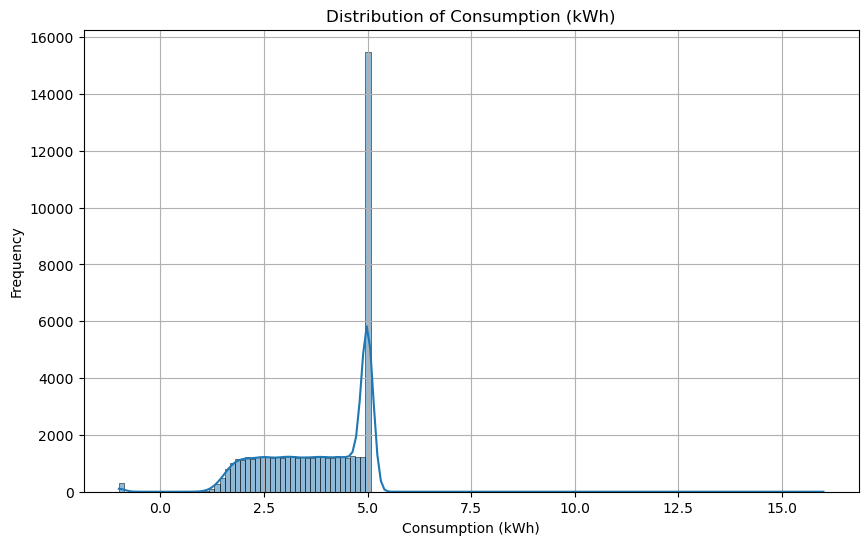

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['consumption_kwh'], kde=True)
plt.title('Distribution of Consumption (kWh)')
plt.xlabel('Consumption (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Time Series Plot

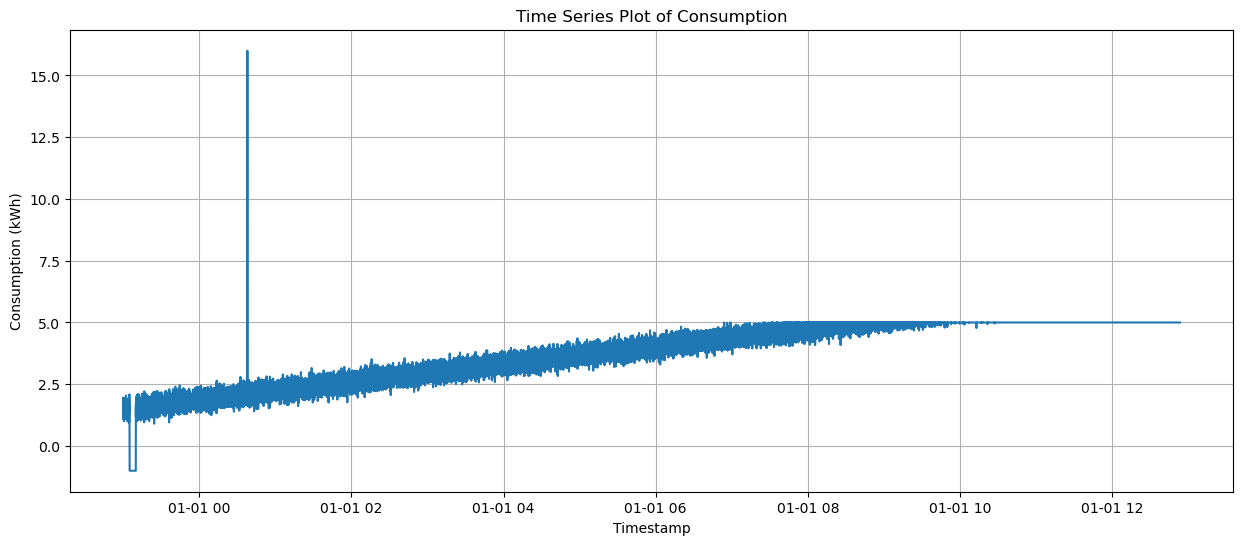

In [8]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='timestamp', y='consumption_kwh', data=df)
plt.title('Time Series Plot of Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.show()

## Box Plot Consumption_kwh

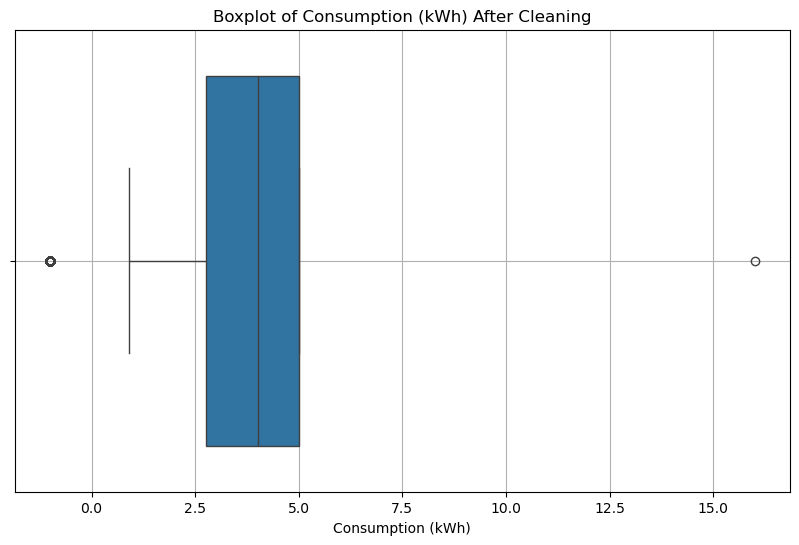

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['consumption_kwh'])
plt.title('Boxplot of Consumption (kWh) After Cleaning')
plt.xlabel('Consumption (kWh)')
plt.grid(True)
plt.show()

In [10]:
# Assuming any consumption value below 0 is an error and should be set to NaN
df['consumption_kwh'] = df['consumption_kwh'].apply(lambda x: x if x >= 0 else None)

# Identifying outliers using the Interquartile Range (IQR) method
Q1 = df['consumption_kwh'].quantile(0.25)
Q3 = df['consumption_kwh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
df_clean = df[(df['consumption_kwh'] >= lower_bound) & (df['consumption_kwh'] <= upper_bound)]

df_clean.describe()

,timestamp,consumption_kwh
count,49601,49601.000000
mean,2023-01-01 05:59:52.282857472,3.790272
min,2022-12-31 23:00:01,0.902245
25%,2023-01-01 02:33:20,2.787579
50%,2023-01-01 06:00:00,4.024342
75%,2023-01-01 09:26:40,5.000000
max,2023-01-01 12:53:20,5.000000
std,NaN,1.160973


In [11]:
## Time Series plot of the clean data

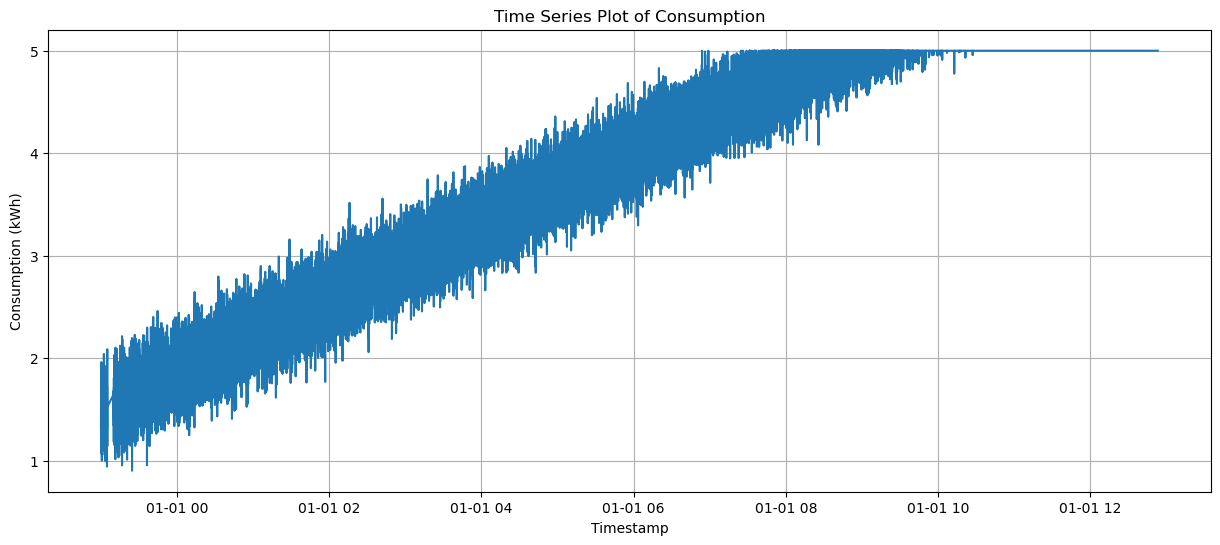

In [12]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='timestamp', y='consumption_kwh', data=df_clean)
plt.title('Time Series Plot of Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.show()

## Rolling Average of Consumption (Trend Analysis)

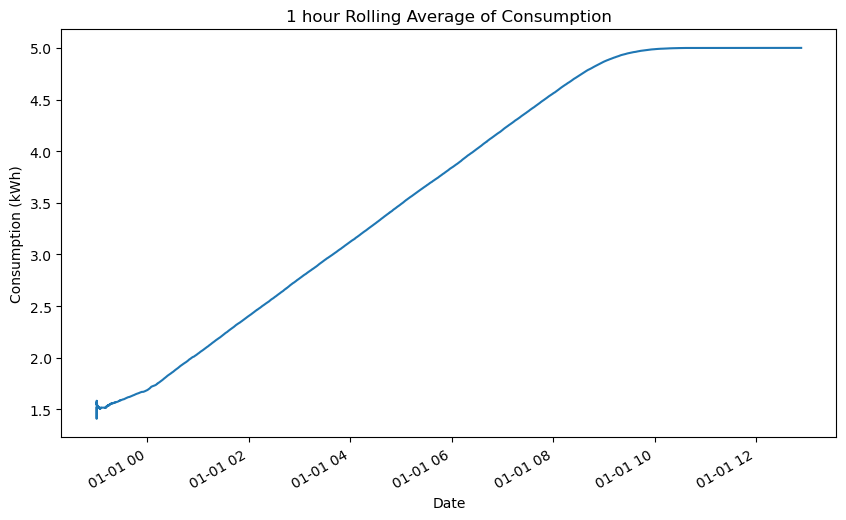

In [13]:
df_clean.set_index("timestamp", inplace=True)
df_clean["consumption_kwh"].rolling('60T').mean().plot(figsize=(10, 6))  # 7-day rolling average
plt.title('1 hour Rolling Average of Consumption')
plt.ylabel('Consumption (kWh)')
plt.xlabel('Date')
plt.show()
